- The analysis of Project Gutenberg
  - https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-06-03/readme.md

- #PydyTuesday

In [58]:
import pydytuesday
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.io as pio
#pio.renderers.default = "notebook_connected"

In [59]:
pydytuesday.get_date('2025-06-03')
gutenberg_metadata = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_metadata.csv')
gutenberg_authors = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_authors.csv')
gutenberg_languages = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_languages.csv')
gutenberg_subjects = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-06-03/gutenberg_subjects.csv')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-06-03/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-06-03/readme.md
Successfully saved gutenberg_authors.csv to /Users/ryohamada/python_ground/tidytuesday/ProjectGutenberg/gutenberg_authors.csv
Successfully saved gutenberg_languages.csv to /Users/ryohamada/python_ground/tidytuesday/ProjectGutenberg/gutenberg_languages.csv
Successfully saved gutenberg_metadata.csv to /Users/ryohamada/python_ground/tidytuesday/ProjectGutenberg/gutenberg_metadata.csv
Successfully saved gutenberg_subjects.csv to /Users/ryohamada/python_ground/tidytuesday/ProjectGutenberg/gutenberg_subjects.csv
Successfully saved meta.yaml to /Users/ryohamada/python_ground/tidytuesday/ProjectGutenberg/meta.yaml
Successfully saved pg-logo-129x80.png to /Users/ryohamada/python_ground/tidytuesday/ProjectGutenberg/pg-l

In [60]:
gutenberg_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79491 entries, 0 to 79490
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gutenberg_id         79491 non-null  int64  
 1   title                79490 non-null  object 
 2   author               76694 non-null  object 
 3   gutenberg_author_id  76694 non-null  float64
 4   language             79491 non-null  object 
 5   gutenberg_bookshelf  78942 non-null  object 
 6   rights               79491 non-null  object 
 7   has_text             79491 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 4.3+ MB


In [61]:
gutenberg_metadata.describe(include='all')

,gutenberg_id,title,author,gutenberg_author_id,language,gutenberg_bookshelf,rights,has_text
count,79491.00000,79490,76694,76694.000000,79491,78942,79491,79491
unique,NaN,74337,25941,NaN,119,8432,2,2
top,NaN,Poems,Various,NaN,en,Browsing: Literature/Browsing: Fiction,Public domain in the USA.,True
freq,NaN,69,3962,NaN,63362,5529,78588,79218
mean,38248.76859,NaN,NaN,19046.221686,NaN,NaN,NaN,NaN
std,21927.41987,NaN,NaN,20334.396956,NaN,NaN,NaN,NaN
min,1.00000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,19305.50000,NaN,NaN,1025.000000,NaN,NaN,NaN,NaN
50%,38321.00000,NaN,NaN,6420.000000,NaN,NaN,NaN,NaN
75%,57189.50000,NaN,NaN,38877.500000,NaN,NaN,NaN,NaN


In [62]:
gutenberg_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26077 entries, 0 to 26076
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gutenberg_author_id  26077 non-null  int64  
 1   author               26077 non-null  object 
 2   alias                8651 non-null   object 
 3   birthdate            19662 non-null  float64
 4   deathdate            18705 non-null  float64
 5   wikipedia            14446 non-null  object 
 6   aliases              15398 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [63]:
gutenberg_languages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76205 entries, 0 to 76204
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gutenberg_id     76205 non-null  int64 
 1   language         76205 non-null  object
 2   total_languages  76205 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [64]:
gutenberg_subjects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255312 entries, 0 to 255311
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   gutenberg_id  255312 non-null  int64 
 1   subject_type  255312 non-null  object
 2   subject       255047 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


In [65]:
df = gutenberg_metadata.merge(gutenberg_authors, how='inner', on='gutenberg_author_id')
df = df.merge(gutenberg_languages, how='inner', on='gutenberg_id')
df = df.merge(gutenberg_subjects, how='inner', on='gutenberg_id')

In [66]:
df.shape

(259074, 18)

In [67]:
df.describe(include='all')

,gutenberg_id,title,author_x,gutenberg_author_id,language_x,gutenberg_bookshelf,rights,has_text,author_y,alias,birthdate,deathdate,wikipedia,aliases,language_y,total_languages,subject_type,subject
count,259074.000000,259074,259074,259074.000000,259074,257668,259074,259074,259074,72734,212901.000000,210059.000000,196777,188799,259074,259074.000000,259074,258796
unique,NaN,71462,25902,NaN,106,8173,2,2,25902,8641,NaN,NaN,14414,15387,64,NaN,2,40097
top,NaN,Poems,Various,NaN,en,Browsing: Culture/Civilization/Society/Browsin...,Public domain in the USA.,True,Various,"Ballantyne, Robert Michael",NaN,NaN,https://en.wikipedia.org/wiki/Anonymous_work|e...,"Verschillende/Various, Various",en,NaN,lcsh,PS
freq,NaN,147,9756,NaN,212201,20555,255809,258180,9756,697,NaN,NaN,2850,9756,212709,NaN,178929,12259
mean,38506.593900,NaN,NaN,18532.971989,NaN,NaN,NaN,NaN,NaN,NaN,1819.620988,1884.516207,NaN,NaN,NaN,1.005249,NaN,NaN
std,22398.637305,NaN,NaN,20315.983501,NaN,NaN,NaN,NaN,NaN,NaN,203.606011,213.889585,NaN,NaN,NaN,0.076316,NaN,NaN
min,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-750.000000,-1105.000000,NaN,NaN,NaN,1.000000,NaN,NaN
25%,19219.000000,NaN,NaN,898.250000,NaN,NaN,NaN,NaN,NaN,NaN,1822.000000,1889.000000,NaN,NaN,NaN,1.000000,NaN,NaN
50%,39083.000000,NaN,NaN,5845.000000,NaN,NaN,NaN,NaN,NaN,NaN,1851.000000,1918.000000,NaN,NaN,NaN,1.000000,NaN,NaN
75%,58251.750000,NaN,NaN,38191.000000,NaN,NaN,NaN,NaN,NaN,NaN,1870.000000,1941.000000,NaN,NaN,NaN,1.000000,NaN,NaN


In [68]:
df.isnull().sum()

gutenberg_id                0
title                       0
author_x                    0
gutenberg_author_id         0
language_x                  0
gutenberg_bookshelf      1406
rights                      0
has_text                    0
author_y                    0
alias                  186340
birthdate               46173
deathdate               49015
wikipedia               62297
aliases                 70275
language_y                  0
total_languages             0
subject_type                0
subject                   278
dtype: int64

In [69]:
df[df['author_x'] != df['author_y']][['gutenberg_id','author_x','author_y']]

,gutenberg_id,author_x,author_y
258841,76000,British Museum. Department of Egyptian and Ass...,"Korppi, Kristian"
258842,76000,British Museum. Department of Egyptian and Ass...,"Korppi, Kristian"


In [70]:
# drop duplicate columns (author, language)
df = df.drop(columns=['author_x', 'language_x'])
df = df.rename(columns={'author_y':'author', 'language_y':'language'})

In [71]:
df.head()

,gutenberg_id,title,gutenberg_author_id,gutenberg_bookshelf,rights,has_text,author,alias,birthdate,deathdate,wikipedia,aliases,language,total_languages,subject_type,subject
0,1,The Declaration of Independence of the United ...,1638.0,Politics/American Revolutionary War/United Sta...,Public domain in the USA.,True,"Jefferson, Thomas",United States President (1801-1809),1743.0,1826.0,https://en.wikipedia.org/wiki/Thomas_Jefferson,United States President (1801-1809),en,1,lcsh,"United States -- History -- Revolution, 1775-1..."
1,1,The Declaration of Independence of the United ...,1638.0,Politics/American Revolutionary War/United Sta...,Public domain in the USA.,True,"Jefferson, Thomas",United States President (1801-1809),1743.0,1826.0,https://en.wikipedia.org/wiki/Thomas_Jefferson,United States President (1801-1809),en,1,lcsh,United States. Declaration of Independence
2,1,The Declaration of Independence of the United ...,1638.0,Politics/American Revolutionary War/United Sta...,Public domain in the USA.,True,"Jefferson, Thomas",United States President (1801-1809),1743.0,1826.0,https://en.wikipedia.org/wiki/Thomas_Jefferson,United States President (1801-1809),en,1,lcc,E201
3,1,The Declaration of Independence of the United ...,1638.0,Politics/American Revolutionary War/United Sta...,Public domain in the USA.,True,"Jefferson, Thomas",United States President (1801-1809),1743.0,1826.0,https://en.wikipedia.org/wiki/Thomas_Jefferson,United States President (1801-1809),en,1,lcc,JK
4,2,The United States Bill of Rights\r\nThe Ten Or...,1.0,Politics/American Revolutionary War/United Sta...,Public domain in the USA.,True,United States,U.S.A.,NaN,NaN,https://en.wikipedia.org/wiki/United_States,U.S.A.,en,1,lcsh,Civil rights -- United States -- Sources


In [72]:
df.shape

(259074, 16)

In [73]:
df[df.isnull().any(axis=1)].shape

(206040, 16)

In [74]:
df.isnull().sum()

gutenberg_id                0
title                       0
gutenberg_author_id         0
gutenberg_bookshelf      1406
rights                      0
has_text                    0
author                      0
alias                  186340
birthdate               46173
deathdate               49015
wikipedia               62297
aliases                 70275
language                    0
total_languages             0
subject_type                0
subject                   278
dtype: int64

In [75]:
# available languages
df['language'].value_counts().iloc[:30]

language
en     212709
fr      12622
fi       9873
de       6911
nl       3548
it       2965
es       2722
pt       1666
hu       1596
zh       1061
el        670
sv        653
la        487
eo        337
da        211
ca        182
tl        151
pl         92
no         84
ja         67
af         47
cs         41
cy         41
fy         39
is         28
ru         25
myn        18
he         15
nav        12
te         12
Name: count, dtype: int64

- → Apparently, English has by far the largest number. So I'll exclude English from the graph below.
  - In addition, I'll split the graph into two, one that contains the top 10 languages, and the other that contains the rest.

In [76]:
# available languages
language_value_counts = df['language'].value_counts()
language_value_counts.index

Index(['en', 'fr', 'fi', 'de', 'nl', 'it', 'es', 'pt', 'hu', 'zh', 'el', 'sv',
       'la', 'eo', 'da', 'ca', 'tl', 'pl', 'no', 'ja', 'af', 'cs', 'cy', 'fy',
       'is', 'ru', 'myn', 'he', 'nav', 'te', 'ro', 'fur', 'bg', 'nai', 'sr',
       'ga', 'ceb', 'nah', 'ang', 'sl', 'gla', 'ilo', 'gl', 'enm', 'oc', 'grc',
       'brx', 'sco', 'iu', 'bgs', 'mi', 'nap', 'oji', 'fa', 'ale', 'ar', 'yi',
       'kld', 'ko', 'kha', 'et', 'csb', 'ia', 'sa'],
      dtype='object', name='language')

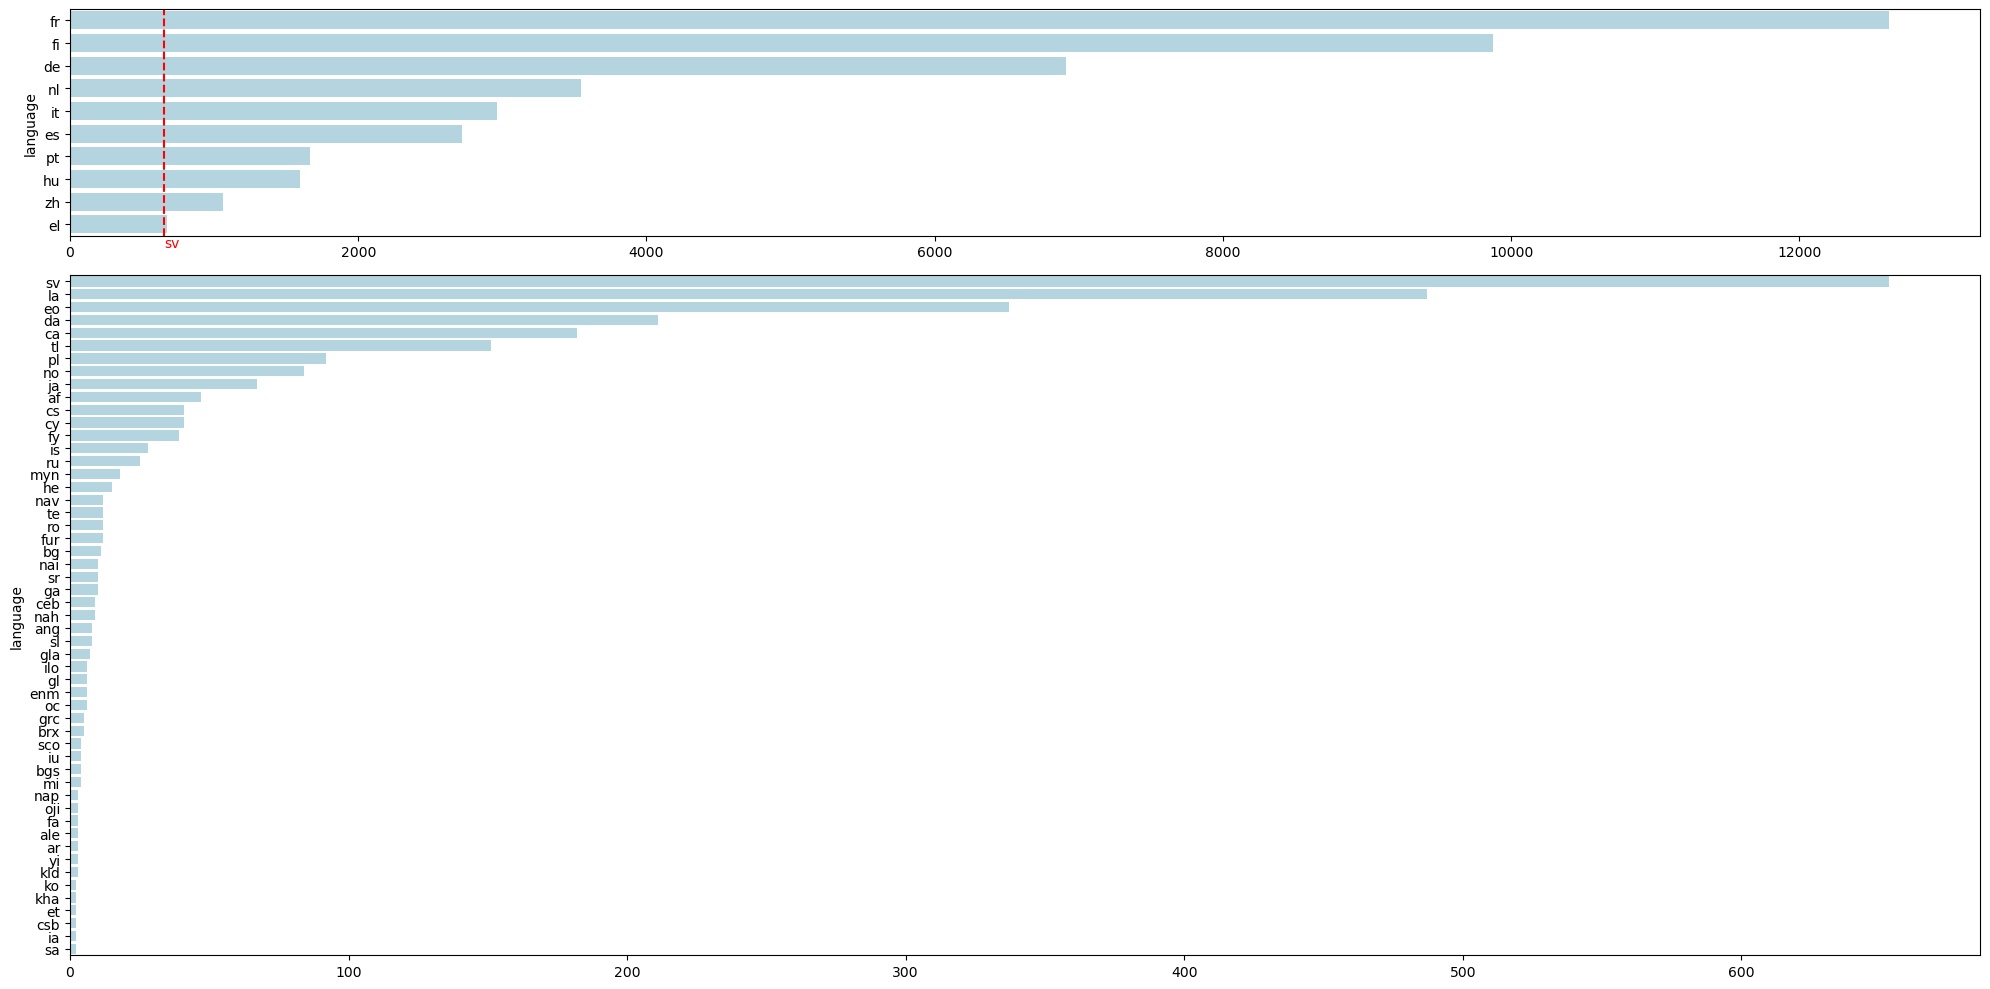

In [77]:
# available languages
language_value_counts = df[df['language']!='en']['language'].value_counts()

fig, ax = plt.subplots(2, 1, figsize=(20,10), gridspec_kw={'height_ratios': [1, 3]})
sns.barplot(x=language_value_counts.head(10).values, y=language_value_counts.head(10).index, color='lightblue', ax=ax[0])
ax[0].axvline(x=language_value_counts.loc['sv'], color='red', linestyle='--')
ax[0].text(language_value_counts.loc['sv'],10, 'sv', color='red')
sns.barplot(x=language_value_counts.iloc[10:].values, y=language_value_counts.iloc[10:].index, color='lightblue', ax=ax[1])
plt.tight_layout()
plt.show()

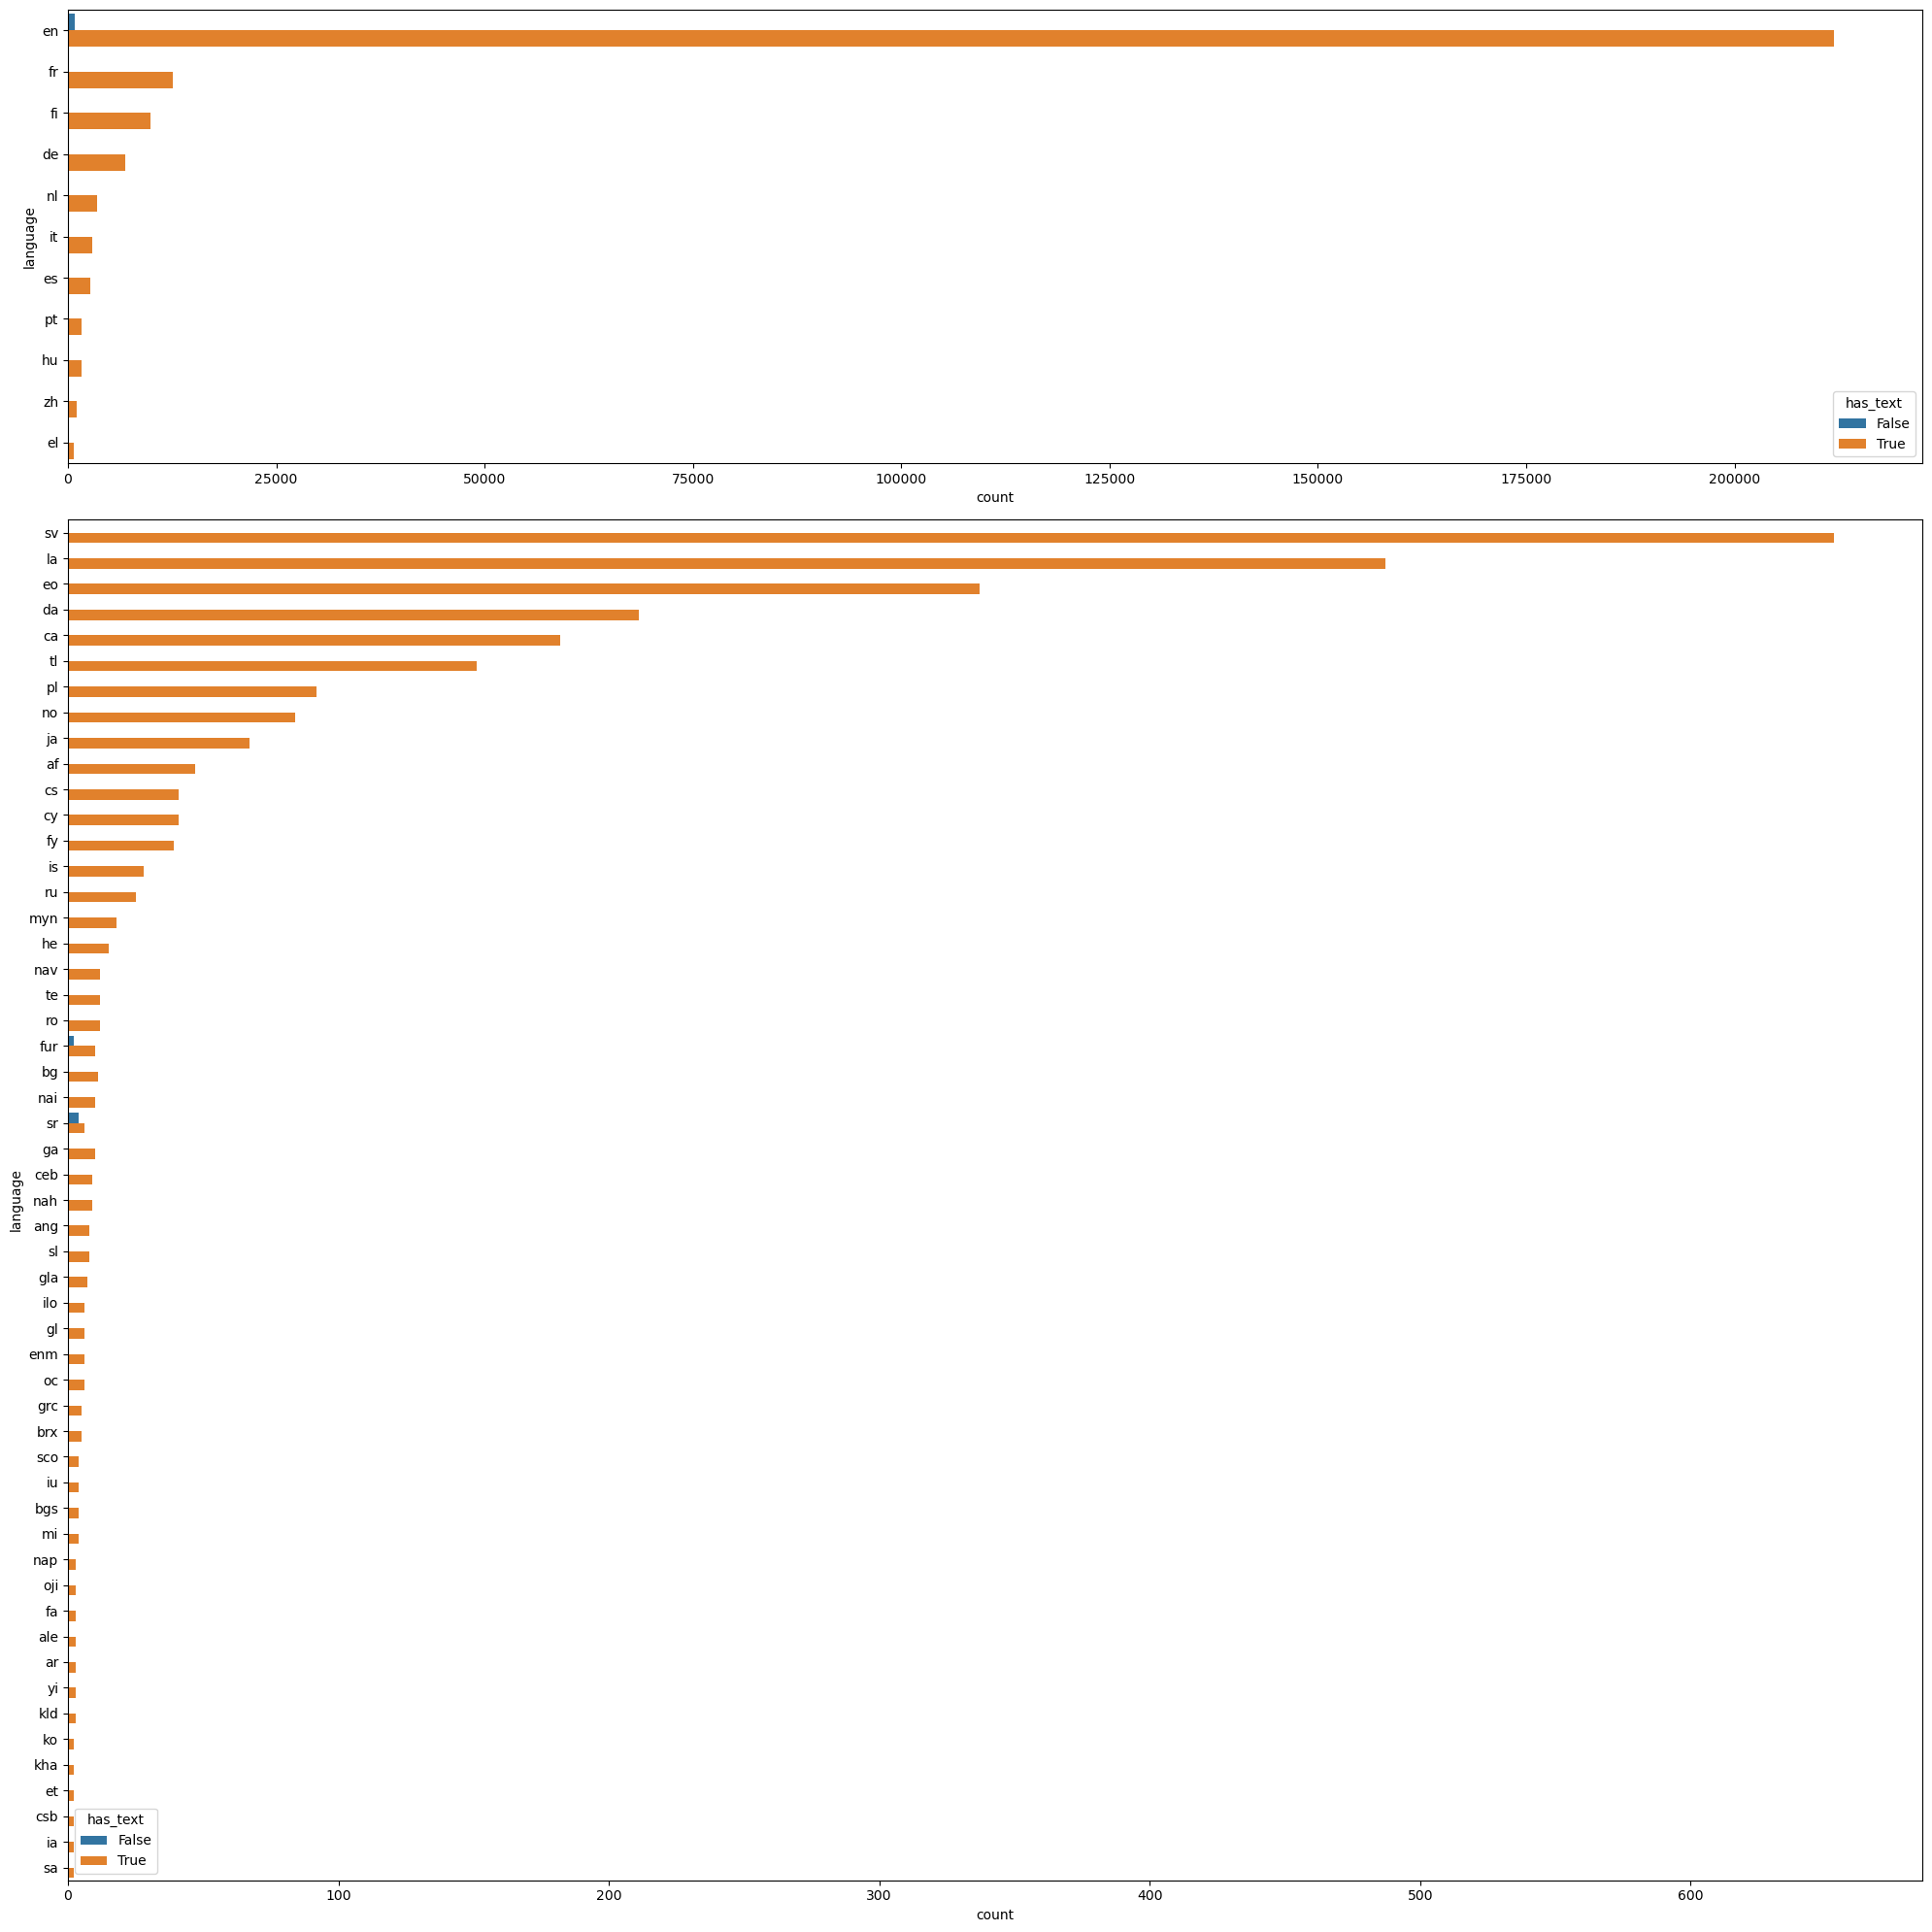

In [78]:
# available languages + text rate
fig, ax = plt.subplots(2, 1, figsize=(20,20), gridspec_kw={'height_ratios':[1,3]})
top_11_languages = ['en','fr','fi','de','nl','it','es','pt','hu','zh','el']
sns.countplot(data=df, y='language', hue='has_text', ax=ax[0], order=df['language'].value_counts().iloc[:11].index)
sns.countplot(data=df, y='language', hue='has_text', ax=ax[1], order=df['language'].value_counts().iloc[11:].index)
plt.tight_layout()
plt.show()

In [79]:
df[df['has_text']==False]['language'].value_counts()

language
en     769
fr      57
de      55
sr       4
it       4
zh       3
fur      2
Name: count, dtype: int64

- → Books that are not in the text format occupy a significantly small percentage of all the books.

In [80]:
df.groupby('author')['gutenberg_id'].nunique().sort_values(ascending=False).iloc[:30]

author
Various                                3959
Anonymous                               927
Shakespeare, William                    334
Twain, Mark                             251
Lytton, Edward Bulwer Lytton, Baron     226
Dickens, Charles                        197
Verne, Jules                            177
Ebers, Georg                            177
Dumas, Alexandre                        164
Balzac, Honoré de                       159
Doyle, Arthur Conan                     150
Unknown                                 149
Jókai, Mór                              146
Oliphant, Mrs. (Margaret)               141
Parker, Gilbert                         134
Kingston, William Henry Giles           133
Fenn, George Manville                   130
Wells, H. G. (Herbert George)           124
Stevenson, Robert Louis                 114
Jacobs, W. W. (William Wymark)          114
London, Jack                            113
Alger, Horatio, Jr.                     113
Meredith, George         

- → Obviously, "Various", "Anonymous" and "Unknown" are not specific human's names, so I'll exclude them

In [81]:
df[~df['author'].isin(['Various', 'Anonymous', 'Unknown'])].groupby('author')['gutenberg_id'].nunique().sort_values(ascending=False).iloc[:30]

author
Shakespeare, William                   334
Twain, Mark                            251
Lytton, Edward Bulwer Lytton, Baron    226
Dickens, Charles                       197
Verne, Jules                           177
Ebers, Georg                           177
Dumas, Alexandre                       164
Balzac, Honoré de                      159
Doyle, Arthur Conan                    150
Jókai, Mór                             146
Oliphant, Mrs. (Margaret)              141
Parker, Gilbert                        134
Kingston, William Henry Giles          133
Fenn, George Manville                  130
Wells, H. G. (Herbert George)          124
Stevenson, Robert Louis                114
Jacobs, W. W. (William Wymark)         114
Alger, Horatio, Jr.                    113
London, Jack                           113
Meredith, George                       112
Howells, William Dean                  111
Henty, G. A. (George Alfred)           111
Stratemeyer, Edward                    104
Zola

- → William Shakespeare has the largest number of gutenberg_id in the library.

In [82]:
author_summary = df[~df['author'].isin(['Various','Anonymous','Unknown'])].groupby('author').agg({'gutenberg_id':'nunique','language':'nunique'})
author_summary_top_100 = author_summary.sort_values(by=['gutenberg_id','language'], ascending=False).head(100)
author_summary_top_100 = author_summary_top_100.reset_index()

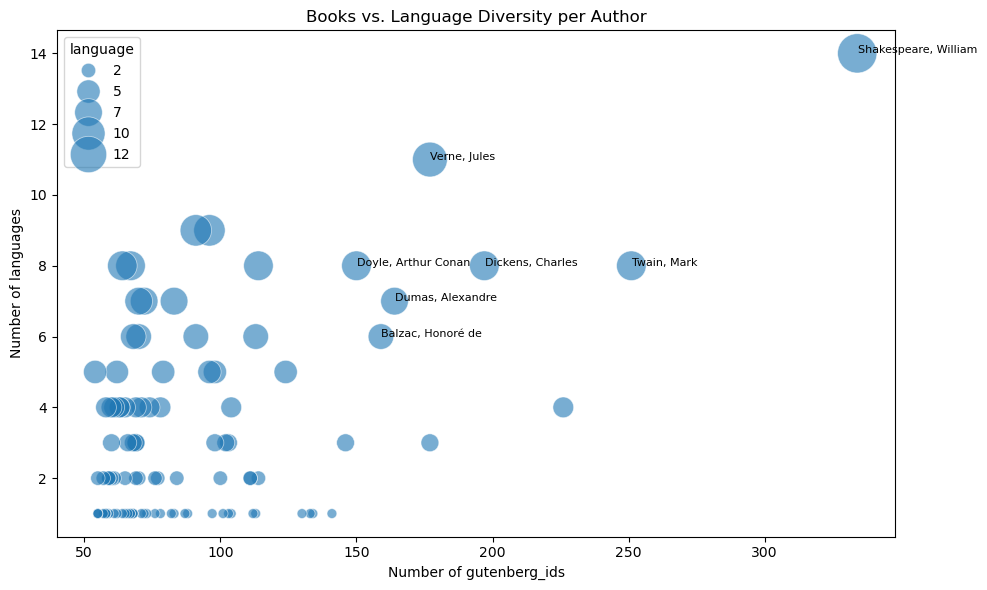

In [86]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=author_summary_top_100,
    x='gutenberg_id',
    y='language',
    size='language',
    sizes=(50, 800),
    alpha=0.6
)
for _, r in author_summary_top_100.iterrows():
    if r['gutenberg_id'] >= 140 and r['language'] >= 6:
        ax.text(r['gutenberg_id'] + 0.2, r['language'], r['author'], fontsize=8)

ax.set(
    xlabel="Number of gutenberg_ids",
    ylabel="Number of languages",
    title="Books vs. Language Diversity per Author"
)

plt.tight_layout()
plt.show()

In [89]:
"""
fig = px.scatter(
    author_summary_top_100,
    x="gutenberg_id",
    y="language",
    size="language",
    size_max=50,
    hover_name="author",
    hover_data={
        "gutenberg_id": True,
        "language": True
    },
    labels={
        "gutenberg_id": "Number of Books",
        "language": "Number of Languages"
    },
    title="Books vs. Language Diversity per Author",
    width=1500,
    height=700
)

fig.show()"""

'\nfig = px.scatter(\n    author_summary_top_100,\n    x="gutenberg_id",\n    y="language",\n    size="language",\n    size_max=50,\n    hover_name="author",\n    hover_data={\n        "gutenberg_id": True,\n        "language": True\n    },\n    labels={\n        "gutenberg_id": "Number of Books",\n        "language": "Number of Languages"\n    },\n    title="Books vs. Language Diversity per Author",\n    width=1500,\n    height=700\n)\n\nfig.show()'

- → William Shakespeare has the largest number of books and languages.
- → Mark Twain has the second largest number of books, and Jules Verne has the second largest number of languages.